In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('palay_data.csv')
data.head()

,Year,Type,Geolocation,Season,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
0,2002,Palay,PHILIPPINES,Average,9325,6964,5068,21357,27483,18158,11194,6126,0.29,6.70,3188,8.62,81285572,2.08
1,2002,Palay,PHILIPPINES,Dry,9106,6982,5466,21554,27394,18288,11306,5840,0.27,6.91,3118,8.79,81285572,2.08
2,2002,Palay,PHILIPPINES,Wet,9549,6946,4667,21162,27573,18024,11078,6411,0.30,6.49,3260,8.46,81285572,2.08
3,2003,Palay,PHILIPPINES,Average,9472,7322,5610,22404,29791,20319,12997,7387,0.33,6.65,3370,8.84,82942837,2.04
4,2003,Palay,PHILIPPINES,Dry,9296,7295,5913,22504,29416,20120,12825,6912,0.31,6.85,3283,8.96,82942837,2.04


In [3]:
# Check for missing values in the merged dataset
data.isnull().sum()

Year                                     0
Type                                     0
Geolocation                              0
Season                                   0
CASH COSTS                               0
NON-CASH COSTS                           0
IMPUTED COSTS                            0
TOTAL COSTS                              0
GROSS RETURNS                            0
RETURNS ABOVE CASH COSTS                 0
RETURNS ABOVE CASH AND NON-CASH COSTS    0
NET RETURNS                              0
NET PROFIT-COST RATIO                    0
Cost per kilogram (pesos)                0
Yield per hectare (kg)                   0
Farmgate price (pesos/kg)                0
Population                               0
Annual % Change                          0
dtype: int64

In [4]:
data.dtypes

Year                                       int64
Type                                      object
Geolocation                               object
Season                                    object
CASH COSTS                                 int64
NON-CASH COSTS                             int64
IMPUTED COSTS                              int64
TOTAL COSTS                                int64
GROSS RETURNS                              int64
RETURNS ABOVE CASH COSTS                   int64
RETURNS ABOVE CASH AND NON-CASH COSTS      int64
NET RETURNS                                int64
NET PROFIT-COST RATIO                    float64
Cost per kilogram (pesos)                float64
Yield per hectare (kg)                     int64
Farmgate price (pesos/kg)                 object
Population                                 int64
Annual % Change                          float64
dtype: object

In [5]:
# Convert object columns to numeric, forcing errors to NaN (in case of any non-numeric values)
columns_to_convert = ['Year', 'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 'GROSS RETURNS',
                      'RETURNS ABOVE CASH COSTS', 'RETURNS ABOVE CASH AND NON-CASH COSTS', 'NET RETURNS',
                      'NET PROFIT-COST RATIO', 'Cost per kilogram (pesos)', 'Yield per hectare (kg)', 
                      'Farmgate price (pesos/kg)']

# Convert the columns to numeric, forcing errors='coerce' to handle any invalid parsing
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [6]:
data.isnull().sum()

Year                                     0
Type                                     0
Geolocation                              0
Season                                   0
CASH COSTS                               0
NON-CASH COSTS                           0
IMPUTED COSTS                            0
TOTAL COSTS                              0
GROSS RETURNS                            0
RETURNS ABOVE CASH COSTS                 0
RETURNS ABOVE CASH AND NON-CASH COSTS    0
NET RETURNS                              0
NET PROFIT-COST RATIO                    0
Cost per kilogram (pesos)                0
Yield per hectare (kg)                   0
Farmgate price (pesos/kg)                9
Population                               0
Annual % Change                          0
dtype: int64

In [7]:
data.head()

,Year,Type,Geolocation,Season,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
0,2002,Palay,PHILIPPINES,Average,9325,6964,5068,21357,27483,18158,11194,6126,0.29,6.70,3188,8.62,81285572,2.08
1,2002,Palay,PHILIPPINES,Dry,9106,6982,5466,21554,27394,18288,11306,5840,0.27,6.91,3118,8.79,81285572,2.08
2,2002,Palay,PHILIPPINES,Wet,9549,6946,4667,21162,27573,18024,11078,6411,0.30,6.49,3260,8.46,81285572,2.08
3,2003,Palay,PHILIPPINES,Average,9472,7322,5610,22404,29791,20319,12997,7387,0.33,6.65,3370,8.84,82942837,2.04
4,2003,Palay,PHILIPPINES,Dry,9296,7295,5913,22504,29416,20120,12825,6912,0.31,6.85,3283,8.96,82942837,2.04


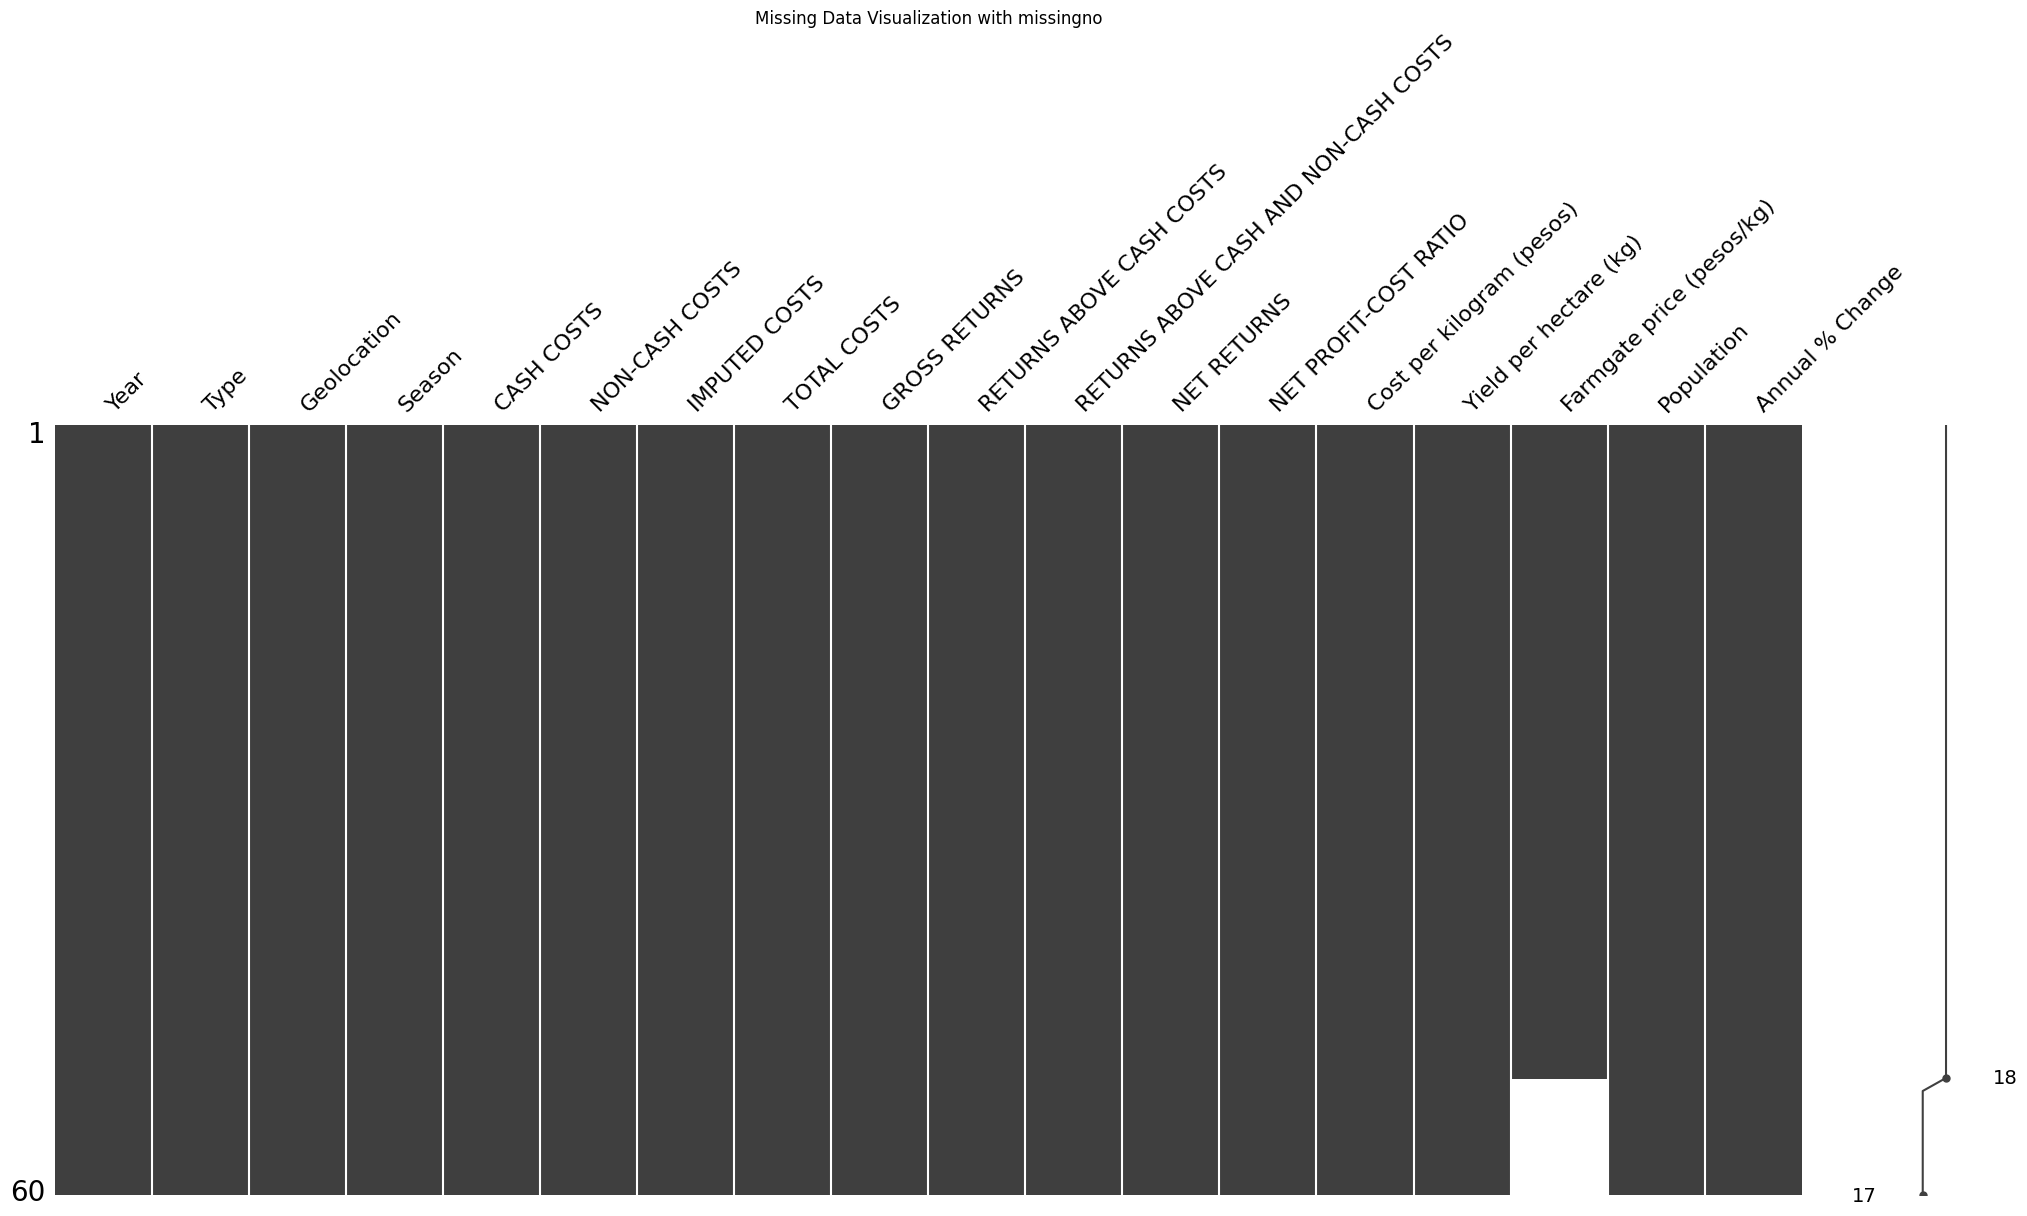

In [8]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data using missingno
msno.matrix(data)
plt.title('Missing Data Visualization with missingno')
plt.show()

In [9]:
# Impute the specified columns using median imputation first
columns_to_impute_median = ['Year', 'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 'GROSS RETURNS',
                            'RETURNS ABOVE CASH COSTS', 'RETURNS ABOVE CASH AND NON-CASH COSTS', 'NET RETURNS',
                            'NET PROFIT-COST RATIO', 'Cost per kilogram (pesos)', 'Yield per hectare (kg)', 
                            'Farmgate price (pesos/kg)']

# Apply median imputation
data[columns_to_impute_median] = data[columns_to_impute_median].fillna(data[columns_to_impute_median].median())

# Now check how many missing values remain
data.isnull().sum()


Year                                     0
Type                                     0
Geolocation                              0
Season                                   0
CASH COSTS                               0
NON-CASH COSTS                           0
IMPUTED COSTS                            0
TOTAL COSTS                              0
GROSS RETURNS                            0
RETURNS ABOVE CASH COSTS                 0
RETURNS ABOVE CASH AND NON-CASH COSTS    0
NET RETURNS                              0
NET PROFIT-COST RATIO                    0
Cost per kilogram (pesos)                0
Yield per hectare (kg)                   0
Farmgate price (pesos/kg)                0
Population                               0
Annual % Change                          0
dtype: int64

In [10]:
import seaborn as sns

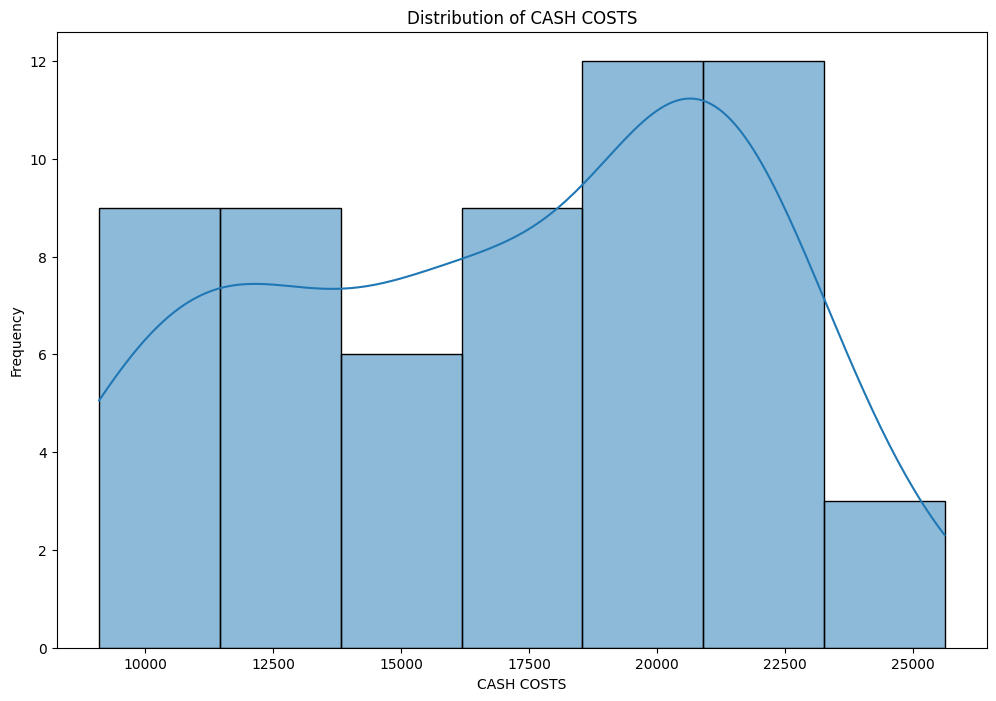

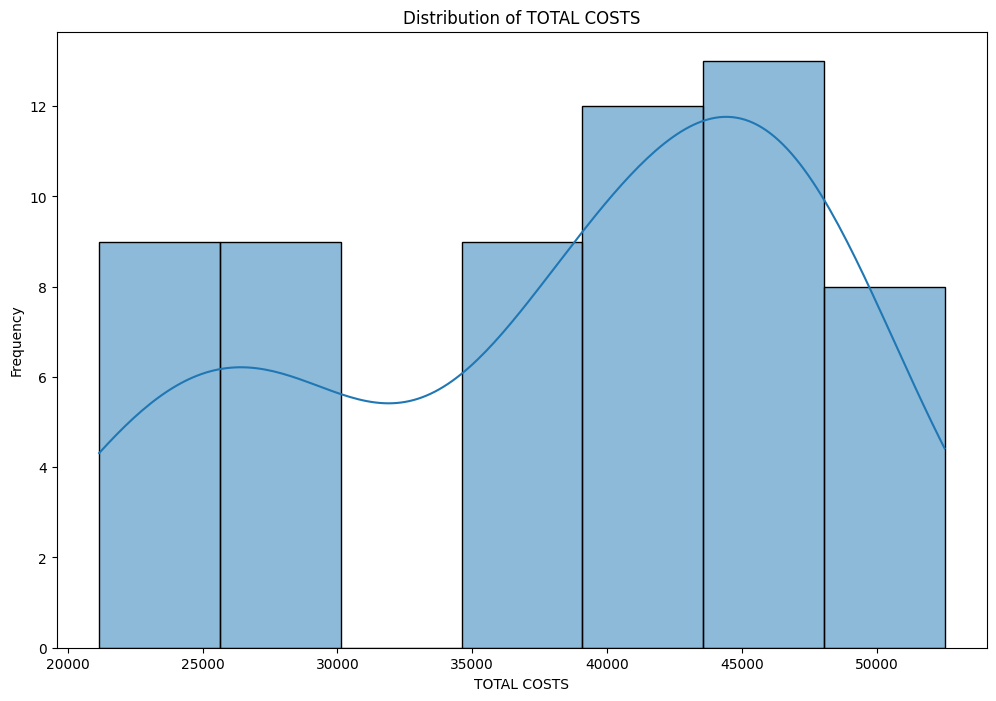

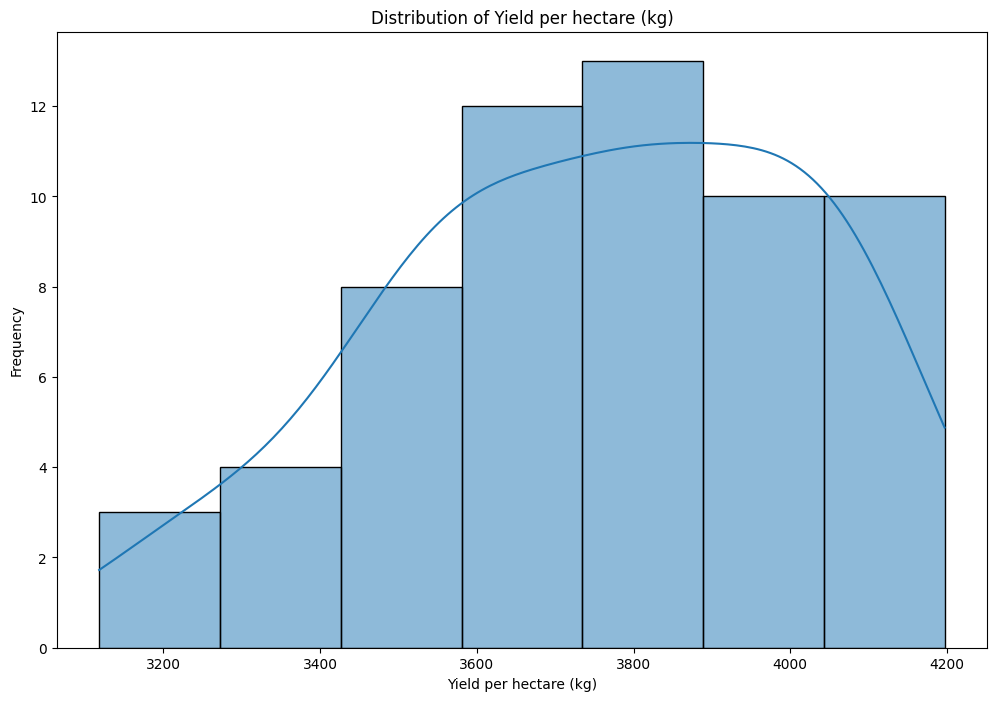

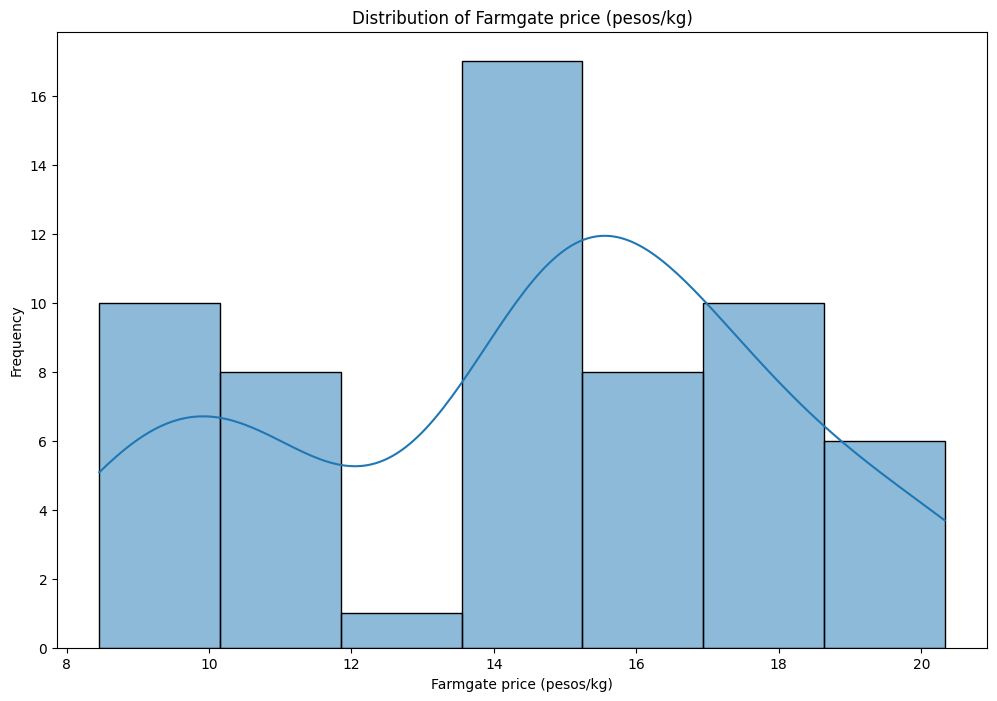

In [11]:
# Plot distribution of key numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(data['CASH COSTS'], kde=True)
plt.title('Distribution of CASH COSTS')
plt.xlabel('CASH COSTS')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['TOTAL COSTS'], kde=True)
plt.title('Distribution of TOTAL COSTS')
plt.xlabel('TOTAL COSTS')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['Yield per hectare (kg)'], kde=True)
plt.title('Distribution of Yield per hectare (kg)')
plt.xlabel('Yield per hectare (kg)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['Farmgate price (pesos/kg)'], kde=True)
plt.title('Distribution of Farmgate price (pesos/kg)')
plt.xlabel('Farmgate price (pesos/kg)')
plt.ylabel('Frequency')
plt.show()

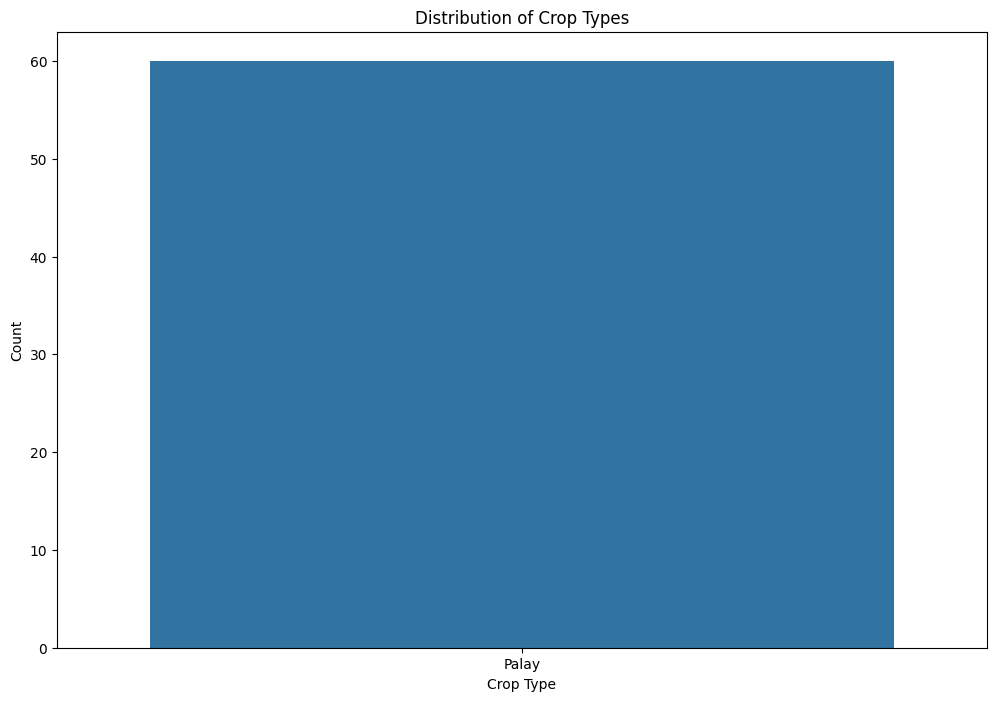

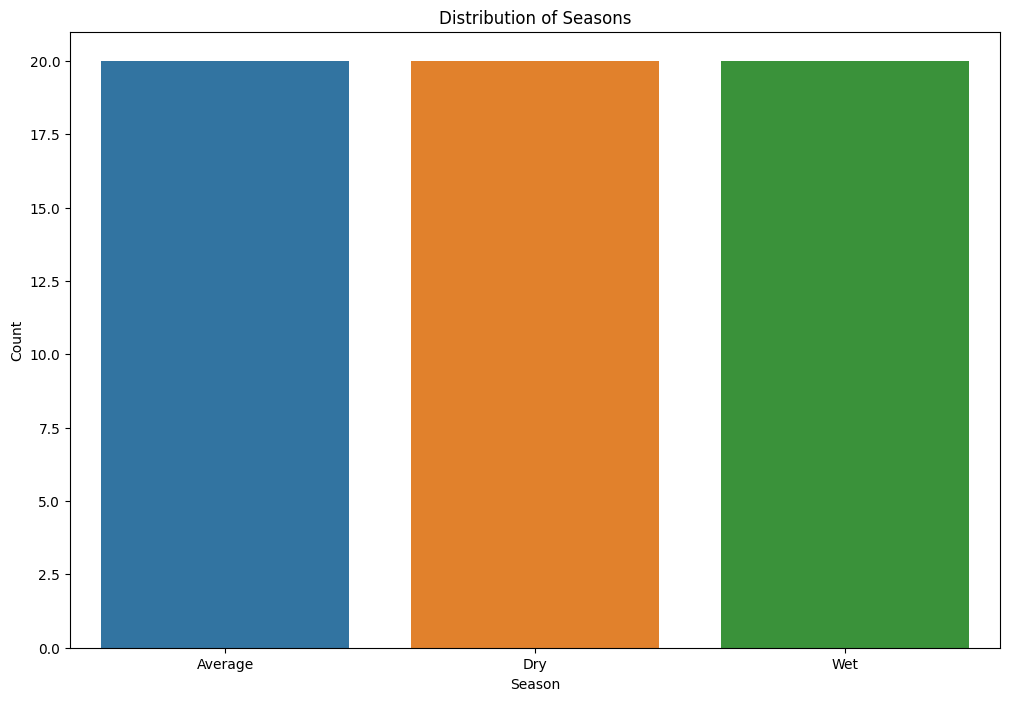

In [12]:
# Plot categorical variable 'Type'
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Type')
plt.title('Distribution of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()

# Plot categorical variable 'Season'
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Season')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

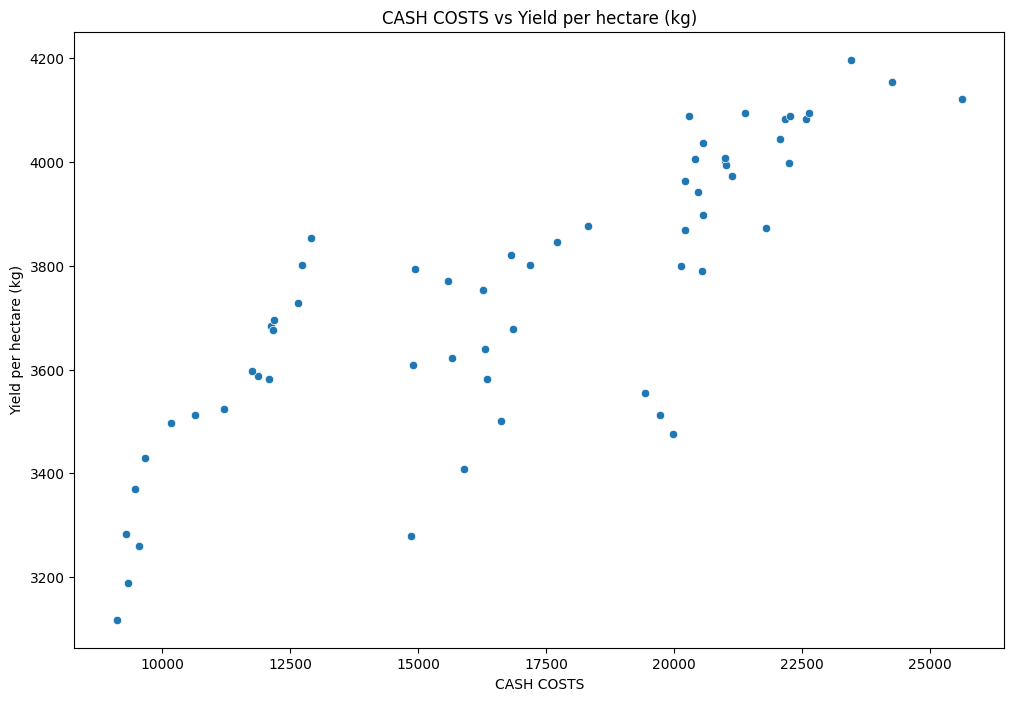

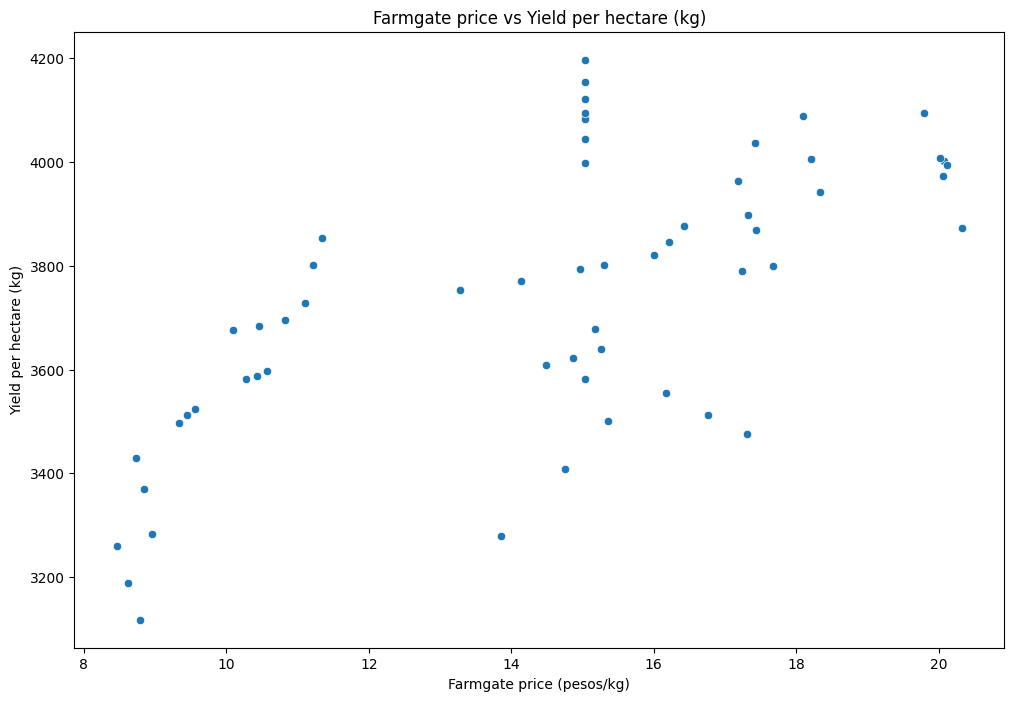

In [13]:
# Scatterplot: CASH COSTS vs Yield per hectare (kg)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='CASH COSTS', y='Yield per hectare (kg)')
plt.title('CASH COSTS vs Yield per hectare (kg)')
plt.xlabel('CASH COSTS')
plt.ylabel('Yield per hectare (kg)')
plt.show()

# Scatterplot: Farmgate price vs Yield per hectare (kg)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Farmgate price (pesos/kg)', y='Yield per hectare (kg)')
plt.title('Farmgate price vs Yield per hectare (kg)')
plt.xlabel('Farmgate price (pesos/kg)')
plt.ylabel('Yield per hectare (kg)')
plt.show()

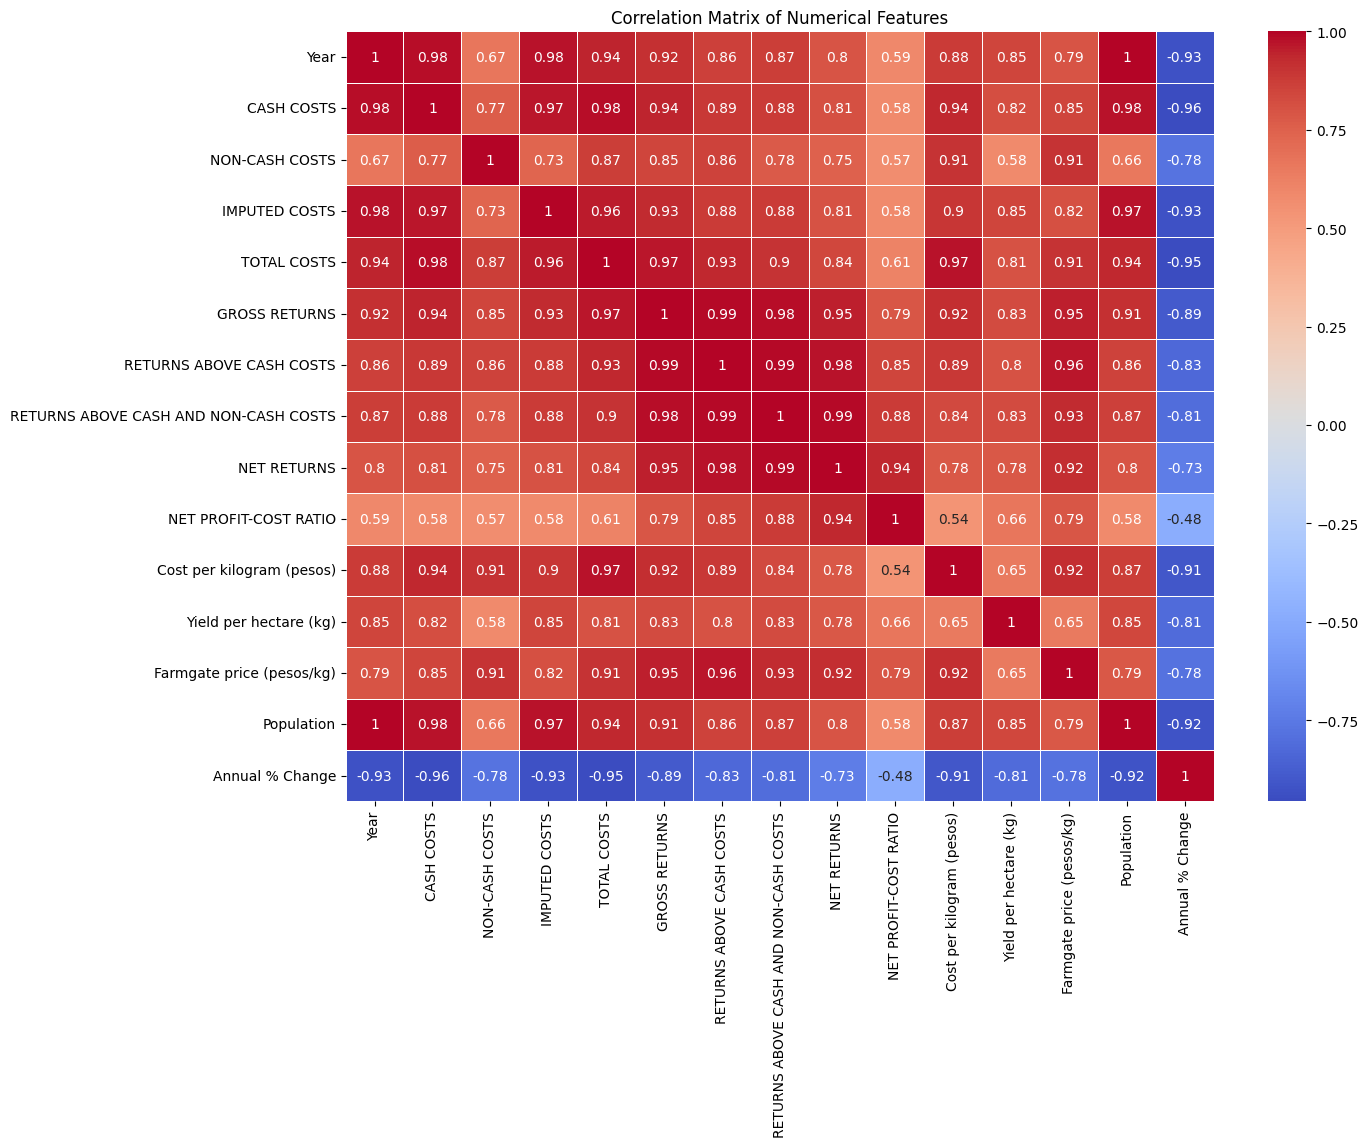

In [14]:
# Select only the numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Generate a correlation matrix for the numerical features
correlation_matrix = numeric_columns.corr()

# Set up the plot for a heatmap
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

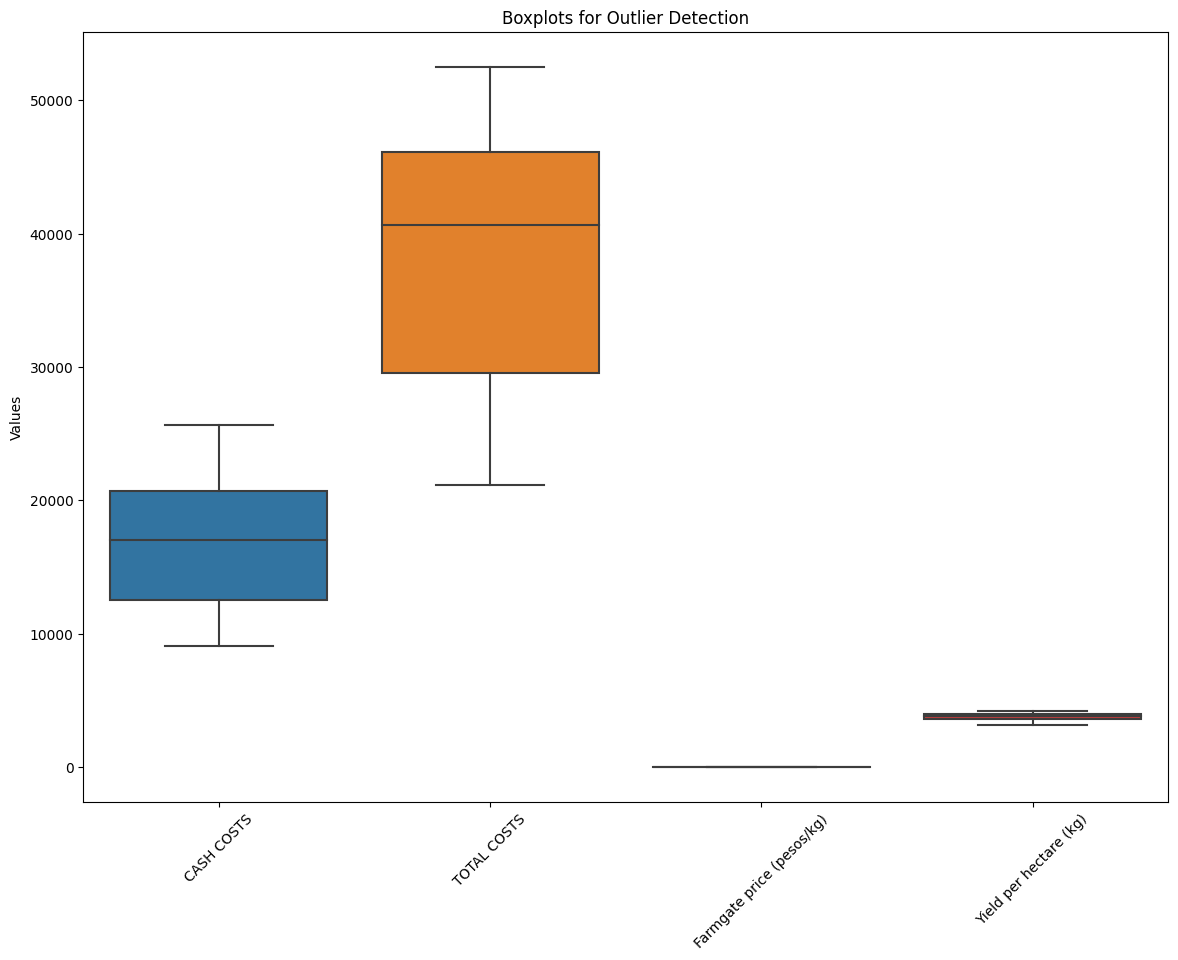

In [15]:
# Set up the figure for outlier detection using boxplots
plt.figure(figsize=(14, 10))

# Create boxplots for key numerical features to visualize outliers
sns.boxplot(data=data[['CASH COSTS', 'TOTAL COSTS', 'Farmgate price (pesos/kg)', 'Yield per hectare (kg)']])
plt.title('Boxplots for Outlier Detection')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Generate summary statistics for the numerical features
summary_statistics = data.describe()

# Display the summary statistics
summary_statistics

,Year,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,2011.500000,17001.266667,12044.250000,9095.933333,38141.416667,55848.733333,38847.416667,26803.200000,17707.300000,0.447333,10.074833,3751.833333,14.451833,9.732290e+07,1.805500
std,5.814943,4626.254028,2761.148549,2389.934336,9238.513064,16246.564413,11990.246028,9720.884592,7691.402152,0.117702,1.990950,268.236878,3.486560,9.967355e+06,0.146535
min,2002.000000,9106.000000,6946.000000,4667.000000,21162.000000,27394.000000,18024.000000,11078.000000,5840.000000,0.270000,6.490000,3118.000000,8.460000,8.128557e+07,1.510000
25%,2006.750000,12537.250000,9575.750000,7069.750000,29553.750000,41048.250000,28510.750000,18659.750000,11175.250000,0.370000,7.777500,3574.500000,11.032500,8.914649e+07,1.695000
50%,2011.500000,17013.000000,12531.500000,9061.000000,40671.500000,57819.500000,39714.000000,25806.500000,16765.500000,0.420000,10.845000,3791.000000,15.040000,9.718512e+07,1.795000
75%,2016.250000,20672.000000,13893.250000,11163.250000,46094.750000,68529.500000,47080.500000,34487.500000,23010.500000,0.522500,11.485000,3995.750000,17.195000,1.053411e+08,1.892500
max,2021.000000,25621.000000,17558.000000,13656.000000,52524.000000,81031.000000,59645.000000,46289.000000,35012.000000,0.760000,12.750000,4197.000000,20.330000,1.138803e+08,2.080000


In [17]:
# Function to cap outliers based on IQR
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    column_capped = column.clip(lower=lower_bound, upper=upper_bound)
    return column_capped

# Capping outliers for the selected numerical features
data['CASH COSTS'] = cap_outliers(data['CASH COSTS'])
data['TOTAL COSTS'] = cap_outliers(data['TOTAL COSTS'])
data['Farmgate price (pesos/kg)'] = cap_outliers(data['Farmgate price (pesos/kg)'])
data['Yield per hectare (kg)'] = cap_outliers(data['Yield per hectare (kg)'])

# Check the summary statistics after capping outliers to see the effect
summary_statistics_after_capping = data.describe()

# Display the summary statistics after capping
summary_statistics_after_capping

,Year,CASH COSTS,NON-CASH COSTS,IMPUTED COSTS,TOTAL COSTS,GROSS RETURNS,RETURNS ABOVE CASH COSTS,RETURNS ABOVE CASH AND NON-CASH COSTS,NET RETURNS,NET PROFIT-COST RATIO,Cost per kilogram (pesos),Yield per hectare (kg),Farmgate price (pesos/kg),Population,Annual % Change
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,2011.500000,17001.266667,12044.250000,9095.933333,38141.416667,55848.733333,38847.416667,26803.200000,17707.300000,0.447333,10.074833,3751.833333,14.451833,9.732290e+07,1.805500
std,5.814943,4626.254028,2761.148549,2389.934336,9238.513064,16246.564413,11990.246028,9720.884592,7691.402152,0.117702,1.990950,268.236878,3.486560,9.967355e+06,0.146535
min,2002.000000,9106.000000,6946.000000,4667.000000,21162.000000,27394.000000,18024.000000,11078.000000,5840.000000,0.270000,6.490000,3118.000000,8.460000,8.128557e+07,1.510000
25%,2006.750000,12537.250000,9575.750000,7069.750000,29553.750000,41048.250000,28510.750000,18659.750000,11175.250000,0.370000,7.777500,3574.500000,11.032500,8.914649e+07,1.695000
50%,2011.500000,17013.000000,12531.500000,9061.000000,40671.500000,57819.500000,39714.000000,25806.500000,16765.500000,0.420000,10.845000,3791.000000,15.040000,9.718512e+07,1.795000
75%,2016.250000,20672.000000,13893.250000,11163.250000,46094.750000,68529.500000,47080.500000,34487.500000,23010.500000,0.522500,11.485000,3995.750000,17.195000,1.053411e+08,1.892500
max,2021.000000,25621.000000,17558.000000,13656.000000,52524.000000,81031.000000,59645.000000,46289.000000,35012.000000,0.760000,12.750000,4197.000000,20.330000,1.138803e+08,2.080000


In [18]:
from sklearn.preprocessing import LabelEncoder

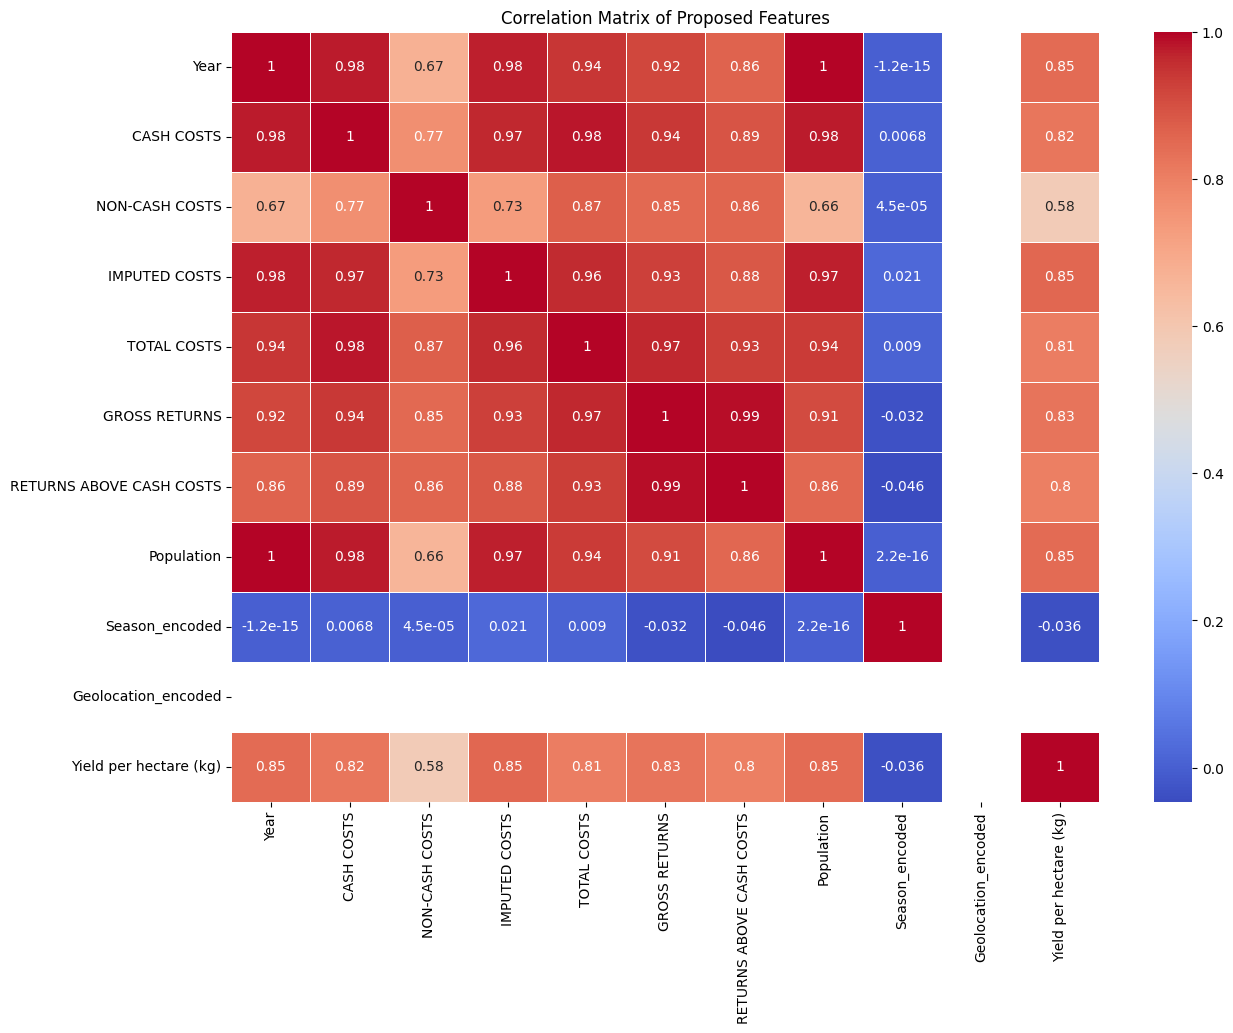

In [19]:
# Re-encode the categorical columns 'Season' and 'Geolocation' to ensure they are present
label_encoder = LabelEncoder()

# Create encoded versions of 'Season' and 'Geolocation'
data['Season_encoded'] = label_encoder.fit_transform(data['Season'])
data['Geolocation_encoded'] = label_encoder.fit_transform(data['Geolocation'])

# Now retry the correlation analysis on the proposed features
proposed_features = [
    'Year', 'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'TOTAL COSTS', 
    'GROSS RETURNS', 'RETURNS ABOVE CASH COSTS', 'Population', 
    'Season_encoded', 'Geolocation_encoded', 'Yield per hectare (kg)'
]

# Generate a correlation matrix for the numerical features
correlation_matrix_proposed = data[proposed_features].corr()

# Set up the plot for a heatmap of the proposed features' correlation matrix
plt.figure(figsize=(14, 10))

# Create a heatmap of the correlation matrix for proposed features
sns.heatmap(correlation_matrix_proposed, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Proposed Features')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
target_variable = 'Yield per hectare (kg)'  # or 'Farmgate price (pesos/kg)' if predicting prices
features = [
    'CASH COSTS', 'NON-CASH COSTS', 'IMPUTED COSTS', 'Year',
    'TOTAL COSTS', 'GROSS RETURNS', 'RETURNS ABOVE CASH COSTS', 
    'Population', 'Season_encoded'
]

# Split the data into training and testing sets (80% training, 20% testing)
X = data[features]
y = data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48, 9), (12, 9), (48,), (12,))

## Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error: {mse_rf}')
print(f'Mean Absolute Error: {mae_rf}')
print(f'R-squared: {r2_rf}')


Mean Squared Error: 8893.941358333332
Mean Absolute Error: 70.83249999999998
R-squared: 0.8961850167732125


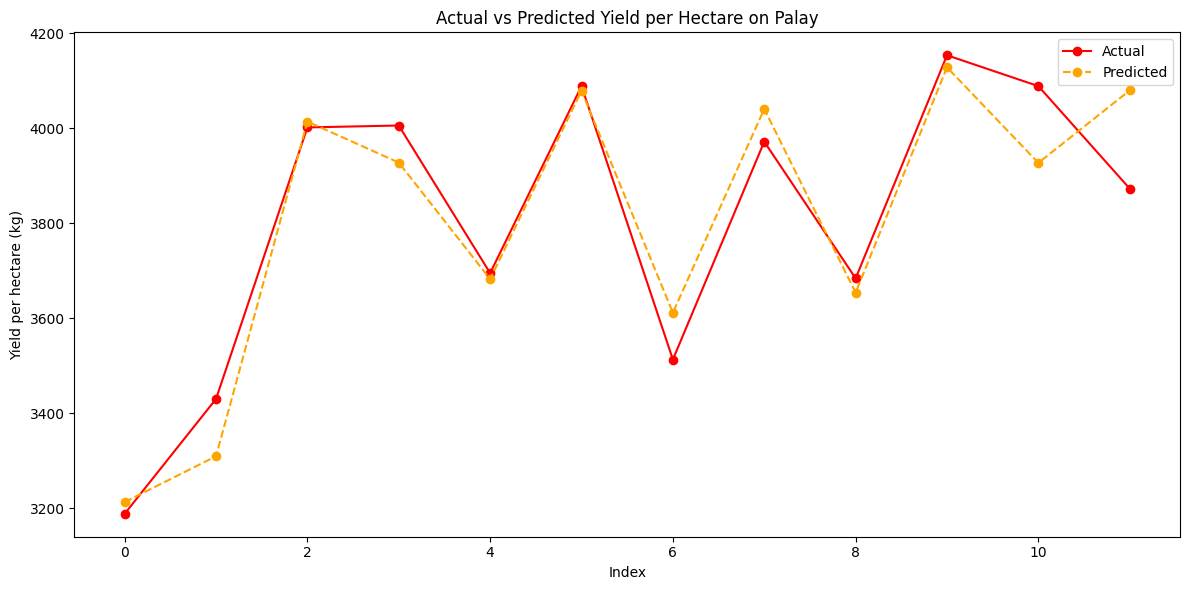

In [26]:
# Plot only the actual (test) and predicted values
plt.figure(figsize=(12, 6))

# Plot actual test data
plt.plot(range(len(y_test)), y_test, label='Actual', color='red', marker='o')

# Plot predicted values
plt.plot(range(len(y_test)), y_pred_rf, label='Predicted', color='orange', linestyle='--', marker='o')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Yield per hectare (kg)')
plt.title('Actual vs Predicted Yield per Hectare on Palay')
plt.legend()
plt.tight_layout()
plt.show()